# Multi-Class Classifier FCNN

This is a fully connected neural network (FCNN) that classifies 3 or more fracture geometries at a time. The below code was inspired by the code tutorial found at https://towardsdatascience.com/pytorch-tabular-multiclass-classification-9f8211a123ab.

## Initial Data Import and Visualization

This section of the code imports data from a local directory (see variable 'path') and visualizes the waveform stack and average waveforms for each fracture geometry type.

In [1]:
#Import libraries
#------------------

from scipy.signal import find_peaks

from numpy.fft import fft, fftfreq
from scipy import fft
from scipy.fft import rfft, rfftfreq, irfft

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from matplotlib.lines import Line2D

from matplotlib import cm
jet = cm.get_cmap('jet', 256)

import os

import numpy as np
from numpy import unravel_index

import pandas as pd

import matplotlib

import csv
# Show Plot in The Notebook
matplotlib.use("nbagg")

/var/folders/wj/d4lgspxd5gg4nzwr_bj4mjzc0000gn/T/ipykernel_15828/1485272434.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap('jet', 256)


In [2]:
#User-defined functions
#-----------------------
def ImportCSV(file):
    data = pd.read_csv(file, delimiter=',')
    data = data.drop(data.columns[0], axis=1)
    
    data_array = np.zeros((len(data), 850))
    for i in range(0, len(data), 1):
        wave = data.loc[i]
        y = wave[300:1150] #crop down waveforms s.t. -20us => 65us in experimental time
        data_array[i] = y
    
    size = len(data)
    return data_array, size
                
def AvgSignal(data, size):
    total = np.zeros(num_point)
    for i in range(0, size, 1):
        y = data[i]
        total = total + y
        
    avg_sig = total / size
    return avg_sig

In [3]:
path = "/Users/alexclark/Desktop/EnNormCSVData/6.4IncSpc-WSUISBPS"

num_point = 850
toi = 3
pretrig = -20

X = [ pretrig + (float(i) / 10) for i in range(0,num_point) ]

### Water-Saturated Fracture Data

In [4]:
os.chdir(path)

for file in os.listdir():
    if file.startswith("WS"):
        file_path = f"{path}/{file}"
        
        WS, WS_tot = ImportCSV(file_path)
        
avg_WS = AvgSignal(WS, WS_tot)

### Uniform Internal Structure (UIS) Data

In [5]:
os.chdir(path)

for file in os.listdir():
    if file.startswith("UIS25.6"): 
        file_path = f"{path}/{file}"
        
        UIS25, UIS25_tot = ImportCSV(file_path)
        
avg_UIS25 = AvgSignal(UIS25, UIS25_tot)

In [6]:
os.chdir(path)

for file in os.listdir():
    if file.startswith("UIS12.8"): 
        file_path = f"{path}/{file}"
        
        UIS12, UIS12_tot = ImportCSV(file_path)
        
avg_UIS12 = AvgSignal(UIS12, UIS12_tot)

In [7]:
os.chdir(path)

for file in os.listdir():
    if file.startswith("UIS6.4"): 
        file_path = f"{path}/{file}"
        
        UIS6, UIS6_tot = ImportCSV(file_path)
        
avg_UIS6 = AvgSignal(UIS6, UIS6_tot)

### Bi-periodic Structure (BPS) Data

In [8]:
os.chdir(path)

for file in os.listdir():
    if file.startswith("6.4-12.8"):
        file_path = f"{path}/{file}"
        
        BPS6_12, BPS6_12_tot = ImportCSV(file_path)
        
avg_BPS6_12 = AvgSignal(BPS6_12, BPS6_12_tot)

In [9]:
os.chdir(path)

for file in os.listdir():
    if file.startswith("6.4-25.6"):
        file_path = f"{path}/{file}"
        
        BPS6_25, BPS6_25_tot = ImportCSV(file_path)
        
avg_BPS6_25 = AvgSignal(BPS6_25, BPS6_25_tot)

In [10]:
os.chdir(path)

for file in os.listdir():
    if file.startswith("12.8-25.6"):
        file_path = f"{path}/{file}"
        
        BPS12_25, BPS12_25_tot = ImportCSV(file_path)
        
avg_BPS12_25 = AvgSignal(BPS12_25, BPS12_25_tot)

## Waveform Stack

<IPython.core.display.Javascript object>


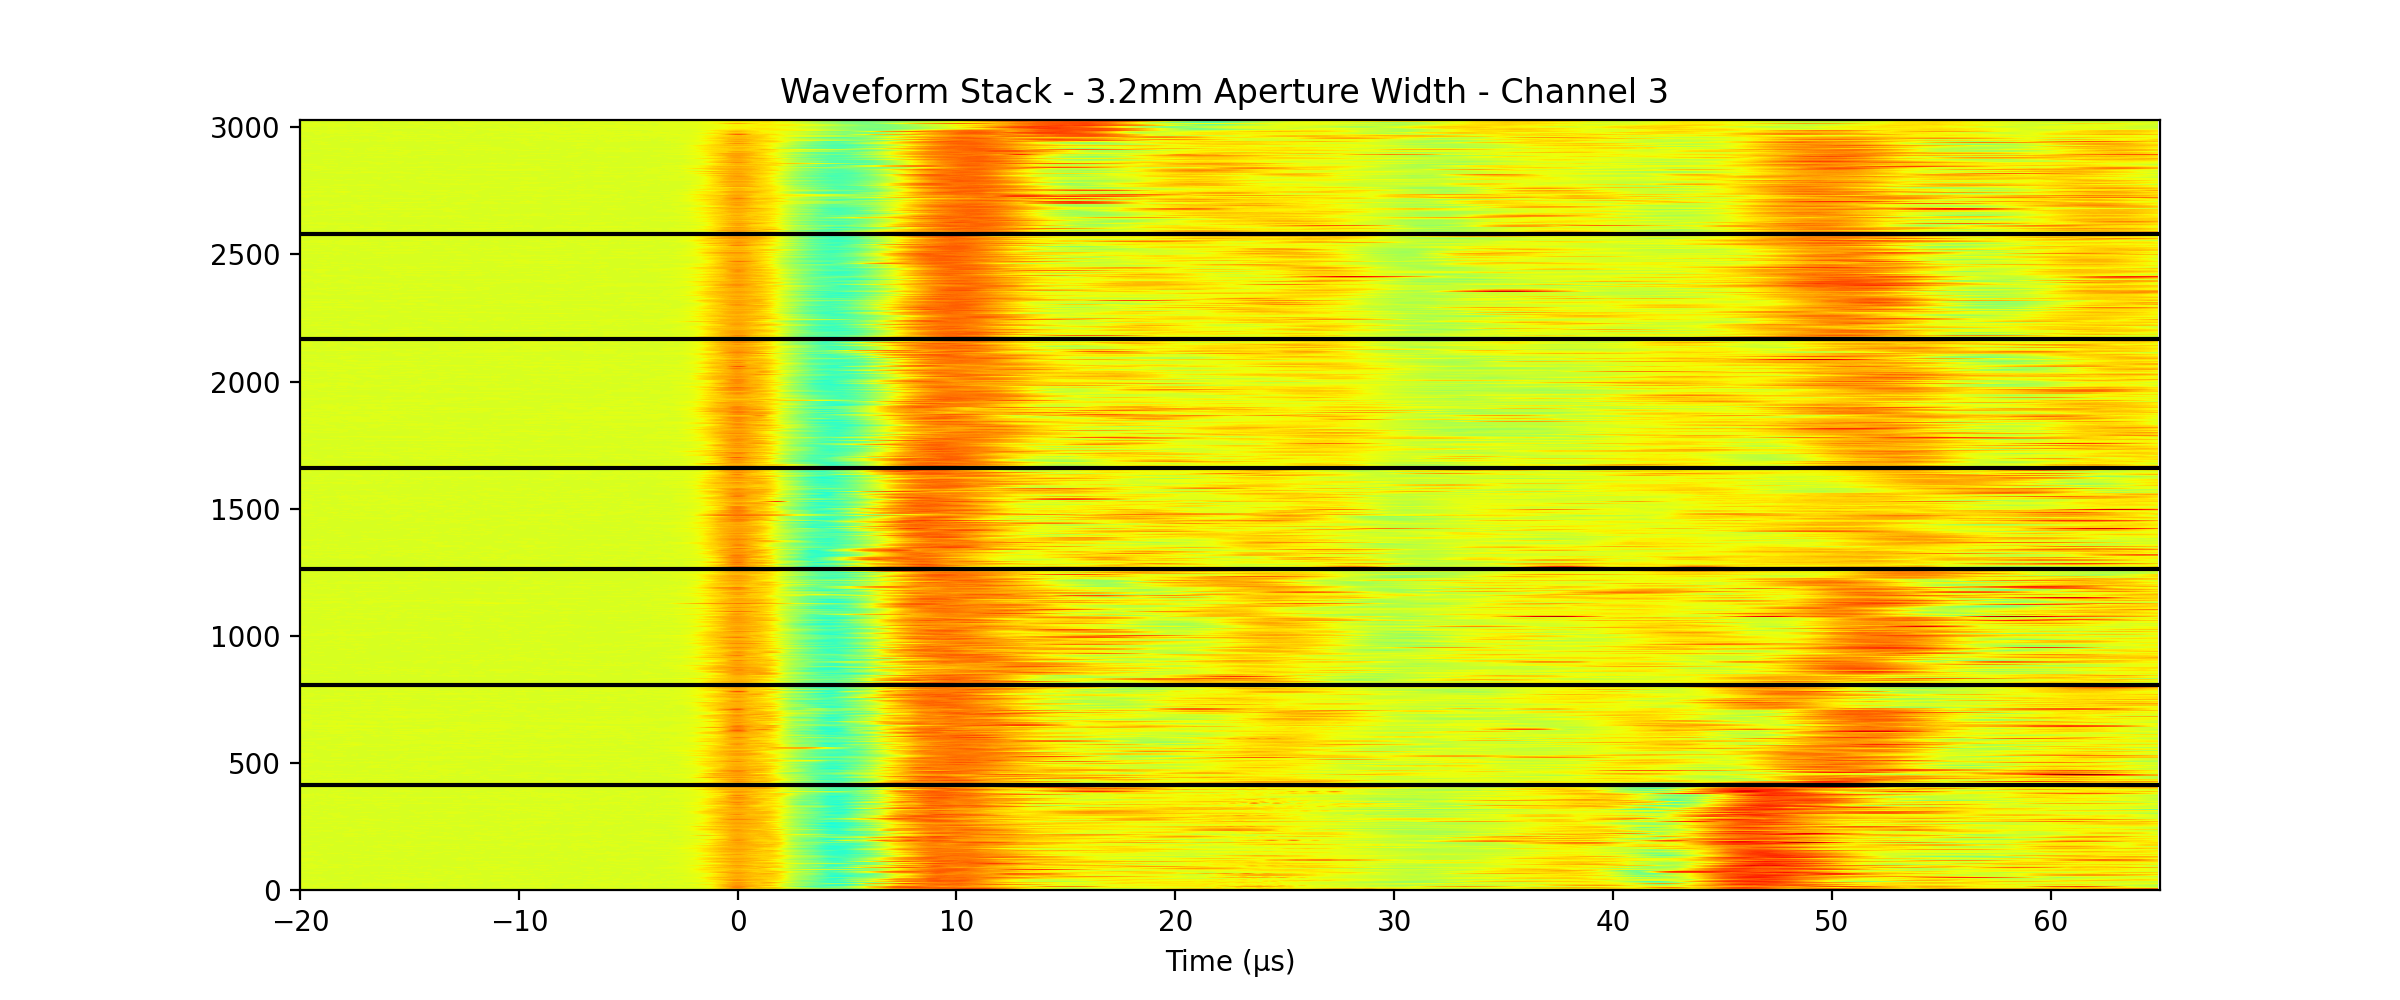

3030


In [11]:
tot_sig = WS_tot+UIS25_tot+UIS12_tot+UIS6_tot+BPS6_12_tot+BPS6_25_tot+BPS12_25_tot
Z = np.concatenate((WS, UIS25, UIS12, UIS6, BPS6_12, BPS6_25, BPS12_25))

fig, ax = plt.subplots(1, 1, figsize=(12,5))

pretrig = -20
X = [ pretrig + (float(i) / 10) for i in range(0,num_point) ]
Y = np.arange(0, tot_sig, 1)

clrmap = plt.contourf(X, Y, Z, 256, cmap=jet)

ax.axhline(WS_tot, color='black')
ax.axhline((WS_tot+UIS25_tot), color='black')
ax.axhline(WS_tot+UIS25_tot+UIS12_tot, color='black')
ax.axhline(WS_tot+UIS25_tot+UIS12_tot+UIS6_tot, color='black')
ax.axhline(WS_tot+UIS25_tot+UIS12_tot+UIS6_tot+BPS6_12_tot, color='black')
ax.axhline(WS_tot+UIS25_tot+UIS12_tot+UIS6_tot+BPS6_12_tot+BPS6_25_tot, color='black')

ax.set_xlim([-20, 65])

#labeling graph
ax.set_xlabel('Time (\u03bcs)')
ax.set_title('Waveform Stack - 3.2mm Aperture Width - Channel %d ' % toi)

plt.show()
print(len(Z))

## Average Signals for Each Geometry

<IPython.core.display.Javascript object>


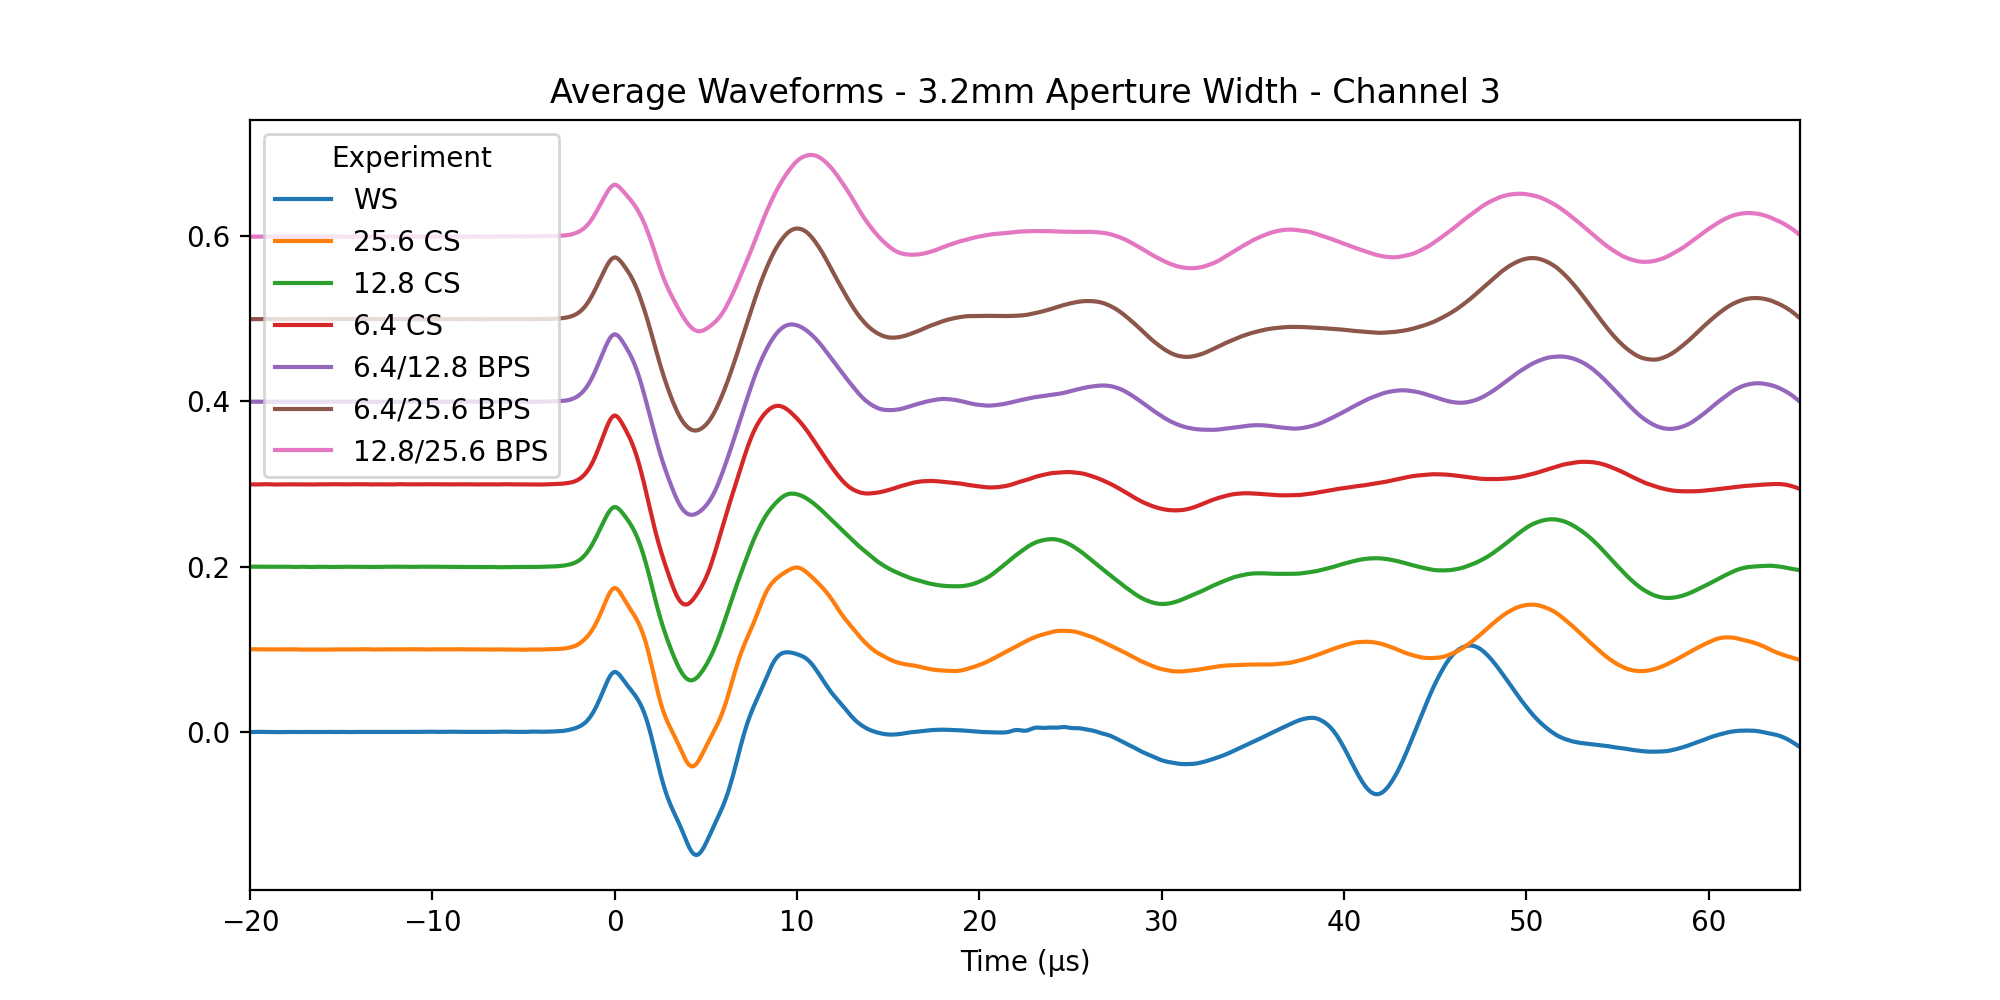

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))

ax.plot(X, avg_WS, label='WS')
ax.plot(X, avg_UIS25+0.1, label='25.6 CS')
ax.plot(X, avg_UIS12+0.2, label='12.8 CS')
ax.plot(X, avg_UIS6+0.3, label='6.4 CS')
ax.plot(X, avg_BPS6_12+0.4, label='6.4/12.8 BPS')
ax.plot(X, avg_BPS6_25+0.5, label='6.4/25.6 BPS')
ax.plot(X, avg_BPS12_25+0.6, label='12.8/25.6 BPS')

ax.set_xlim([-20, 65])
ax.set_xlabel('Time (\u03bcs)')
ax.legend(title='Experiment', loc='upper left')

ax.set_title('Average Waveforms - 3.2mm Aperture Width - Channel %d' %toi)

plt.show()

# Neural Network

This section is where the neural network is designed and built to train/test classification on the above imported datasets.

### Labeling data for classification

In [14]:
#Number labels for each geometry class
WS_num = 0
UIS25_num = 1
UIS12_num = 2
UIS6_num = 3
BPS6_12_num = 1
BPS6_25_num = 2
BPS12_25_num = 3

#defining arrays same size as total number of waveforms per geometry class
WS_num_array = np.ones((WS_tot))#, 4))
UIS25_num_array = np.ones((UIS25_tot))#,4))
UIS12_num_array = np.ones((UIS12_tot))#,4))
UIS6_num_array = np.ones((UIS6_tot))#,4))
BPS6_12_num_array = np.ones(BPS6_12_tot)
BPS6_25_num_array = np.ones(BPS6_25_tot)
BPS12_25_num_array = np.ones(BPS12_25_tot)

#array with label for each class
WS_num_array = WS_num * WS_num_array
UIS25_num_array = UIS25_num * UIS25_num_array
UIS12_num_array = UIS12_num * UIS12_num_array
UIS6_num_array = UIS6_num * UIS6_num_array
BPS6_12_num_array = BPS6_12_num * BPS6_12_num_array
BPS6_25_num_array = BPS6_25_num * BPS6_25_num_array
BPS12_25_num_array = BPS12_25_num * BPS12_25_num_array

In [16]:
#Datasets : concatenate the data classes of interest
#---------------------------------------------------
#X = np.concatenate((WS, UIS25, UIS12, UIS6)) #WS & UIS
X = np.concatenate((WS, BPS6_12, BPS6_25, BPS12_25)) #WS & BPS
Y = np.concatenate((WS_num_array, BPS6_12_num_array, BPS6_25_num_array, BPS12_25_num_array)) #classification labels
#Y = np.concatenate((WS_num_array, UIS25_num_array, UIS12_num_array, UIS6_num_array))
Y = Y.astype('int32').reshape((-1,1))

print(len(X))
print(len(Y))

print('Input: ', X)
print('Class: ', Y)

1785
1785
Input:  [[-0.00142487 -0.00071243 -0.00035622 ...  0.03455306  0.02992225
   0.02529142]
 [ 0.00381522  0.00381522  0.00410869 ... -0.06016301 -0.05957605
  -0.06133692]
 [ 0.00199751  0.00133168 -0.00033292 ... -0.04494419 -0.04627587
  -0.04794047]
 ...
 [-0.00269023 -0.00307455 -0.00269023 ... -0.00057648 -0.0019216
  -0.00403535]
 [ 0.00245416  0.00280476  0.00070119 ... -0.02524277 -0.02594395
  -0.02559335]
 [-0.00509757 -0.00627392 -0.00745028 ... -0.00745028 -0.00901876
  -0.01058725]]
Class:  [[0]
 [0]
 [0]
 ...
 [3]
 [3]
 [3]]


### Splitting data into training and testing sets

In [17]:
import torch
from sklearn.model_selection import train_test_split

X = torch.Tensor(X)
Y = torch.Tensor(Y)

X_trainval, X_test, Y_trainval, Y_test = train_test_split(X, Y, test_size=0.25, shuffle=True) #stratify = Y
X_train, X_val, Y_train, Y_val = train_test_split(X_trainval, Y_trainval, test_size=0.3, shuffle=True) #stratify = Y_trainval


print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"Y_val shape: {Y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_test shape: {Y_test.shape}")


/Users/alexclark/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


X_train shape: torch.Size([936, 850])
Y_train shape: torch.Size([936, 1])
X_val shape: torch.Size([402, 850])
Y_val shape: torch.Size([402, 1])
X_test shape: torch.Size([447, 850])
Y_test shape: torch.Size([447, 1])


### Normalizing Input

Neural network requires data that lies between 0 and 1, so we scale all values below.

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_train, Y_train = np.array(X_train), np.array(Y_train)
X_val, Y_val = np.array(X_val), np.array(Y_val)
X_test, Y_test = np.array(X_test), np.array(Y_test)

#print(X_train)

In [19]:
from torch import Tensor
from torch.utils.data import Dataset, DataLoader

class ClassifierDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_dataset = ClassifierDataset(torch.from_numpy(X_train).float(), torch.from_numpy(Y_train).long()) #long

val_dataset = ClassifierDataset(torch.from_numpy(X_val).float(), torch.from_numpy(Y_val).long())

test_dataset = ClassifierDataset(torch.from_numpy(X_test).float(), torch.from_numpy(Y_test).long())

## Model Parameters

In [20]:
epochs = 70
batch_size = 64
learning_rate = 0.0007
num_features = len(X[0])
num_classes = 4

In [21]:
train_loader = DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)

val_loader = DataLoader(dataset=val_dataset, batch_size=1)

test_loader = DataLoader(dataset=test_dataset, batch_size=1)

In [22]:
import torch.nn as nn

class MulticlassClassification(nn.Module):
    def __init__(self, num_feature, num_class):
        super(MulticlassClassification, self).__init__()
        
        self.layer_1 = nn.Linear(num_feature, 512)
        self.layer_2 = nn.Linear(512, 128)
        self.layer_3 = nn.Linear(128, 64)
        self.layer_out = nn.Linear(64, num_classes) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm1 = nn.BatchNorm1d(512)
        self.batchnorm2 = nn.BatchNorm1d(128)
        self.batchnorm3 = nn.BatchNorm1d(64)
        
    def forward(self, x):
        x = self.layer_1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        
        x = self.layer_2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_3(x)
        x = self.batchnorm3(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_out(x)
        
        return x

In [23]:
import torch.optim as optim

model = MulticlassClassification(num_feature = num_features, num_class = num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

print(model)

MulticlassClassification(
  (layer_1): Linear(in_features=850, out_features=512, bias=True)
  (layer_2): Linear(in_features=512, out_features=128, bias=True)
  (layer_3): Linear(in_features=128, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=4, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (batchnorm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


## Training

In [24]:
def multi_acc(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim=1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim=1)
    
    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)
    
    acc = torch.round(acc * 100)
    
    return acc
    
#accuracy and loss dictionaries
#------------------------------
accuracy_stats = {'train':[], 'val':[]}
loss_stats = {'train':[], 'val':[]}

In [25]:
#from tqdm.notebook import tqdm

print("Begin training...")

for e in range(1, epochs+1):
    
    # TRAINING
    train_epoch_loss = 0
    train_epoch_acc = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
        optimizer.zero_grad()
        
        y_train_pred = model(X_train_batch)
        train_loss = criterion(y_train_pred, torch.max(y_train_batch, 1)[0])
        train_acc = multi_acc(y_train_pred, torch.max(y_train_batch, 1)[0])
        
        train_loss.backward()
        optimizer.step()
        
        train_epoch_loss += train_loss.item()
        train_epoch_acc += train_acc.item()
        
        
    # VALIDATION    
    with torch.no_grad():
        
        val_epoch_loss = 0
        val_epoch_acc = 0
        
        model.eval()
        for X_val_batch, y_val_batch in val_loader:
            
            y_val_pred = model(X_val_batch)
                        
            val_loss = criterion(y_val_pred,torch.max(y_val_batch, 1)[0])
            val_acc = multi_acc(y_val_pred,torch.max(y_val_batch, 1)[0])
            
            val_epoch_loss += val_loss.item()
            val_epoch_acc += val_acc.item()
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))
    accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
    accuracy_stats['val'].append(val_epoch_acc/len(val_loader))
                              
    
    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.3f}| Val Acc: {val_epoch_acc/len(val_loader):.3f}')


Begin training...
Epoch 001: | Train Loss: 0.91891 | Val Loss: 1.09967 | Train Acc: 64.200| Val Acc: 66.169
Epoch 002: | Train Loss: 0.56142 | Val Loss: 0.62573 | Train Acc: 85.400| Val Acc: 82.338
Epoch 003: | Train Loss: 0.41159 | Val Loss: 0.46964 | Train Acc: 90.133| Val Acc: 84.577
Epoch 004: | Train Loss: 0.31299 | Val Loss: 0.39447 | Train Acc: 91.267| Val Acc: 87.065
Epoch 005: | Train Loss: 0.23137 | Val Loss: 0.40194 | Train Acc: 94.467| Val Acc: 84.826
Epoch 006: | Train Loss: 0.18774 | Val Loss: 0.37436 | Train Acc: 96.000| Val Acc: 87.065
Epoch 007: | Train Loss: 0.14590 | Val Loss: 0.39325 | Train Acc: 97.200| Val Acc: 85.821
Epoch 008: | Train Loss: 0.12890 | Val Loss: 0.29837 | Train Acc: 97.267| Val Acc: 89.303
Epoch 009: | Train Loss: 0.10288 | Val Loss: 0.36039 | Train Acc: 97.733| Val Acc: 87.313
Epoch 010: | Train Loss: 0.09210 | Val Loss: 0.32558 | Train Acc: 98.600| Val Acc: 88.557
Epoch 011: | Train Loss: 0.06657 | Val Loss: 0.32915 | Train Acc: 98.800| Val Acc:

In [26]:
# Create dataframes to visualize accuracy and loss
#----------------------------------------------------
train_val_acc_df = pd.DataFrame.from_dict(accuracy_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})

train_val_split_acc = train_val_acc_df.groupby('variable')
train_acc = train_val_split_acc.get_group('train')
val_acc = train_val_split_acc.get_group('val')

train_val_split_loss = train_val_loss_df.groupby('variable')
train_loss = train_val_split_loss.get_group('train')
val_loss = train_val_split_loss.get_group('val')

<IPython.core.display.Javascript object>


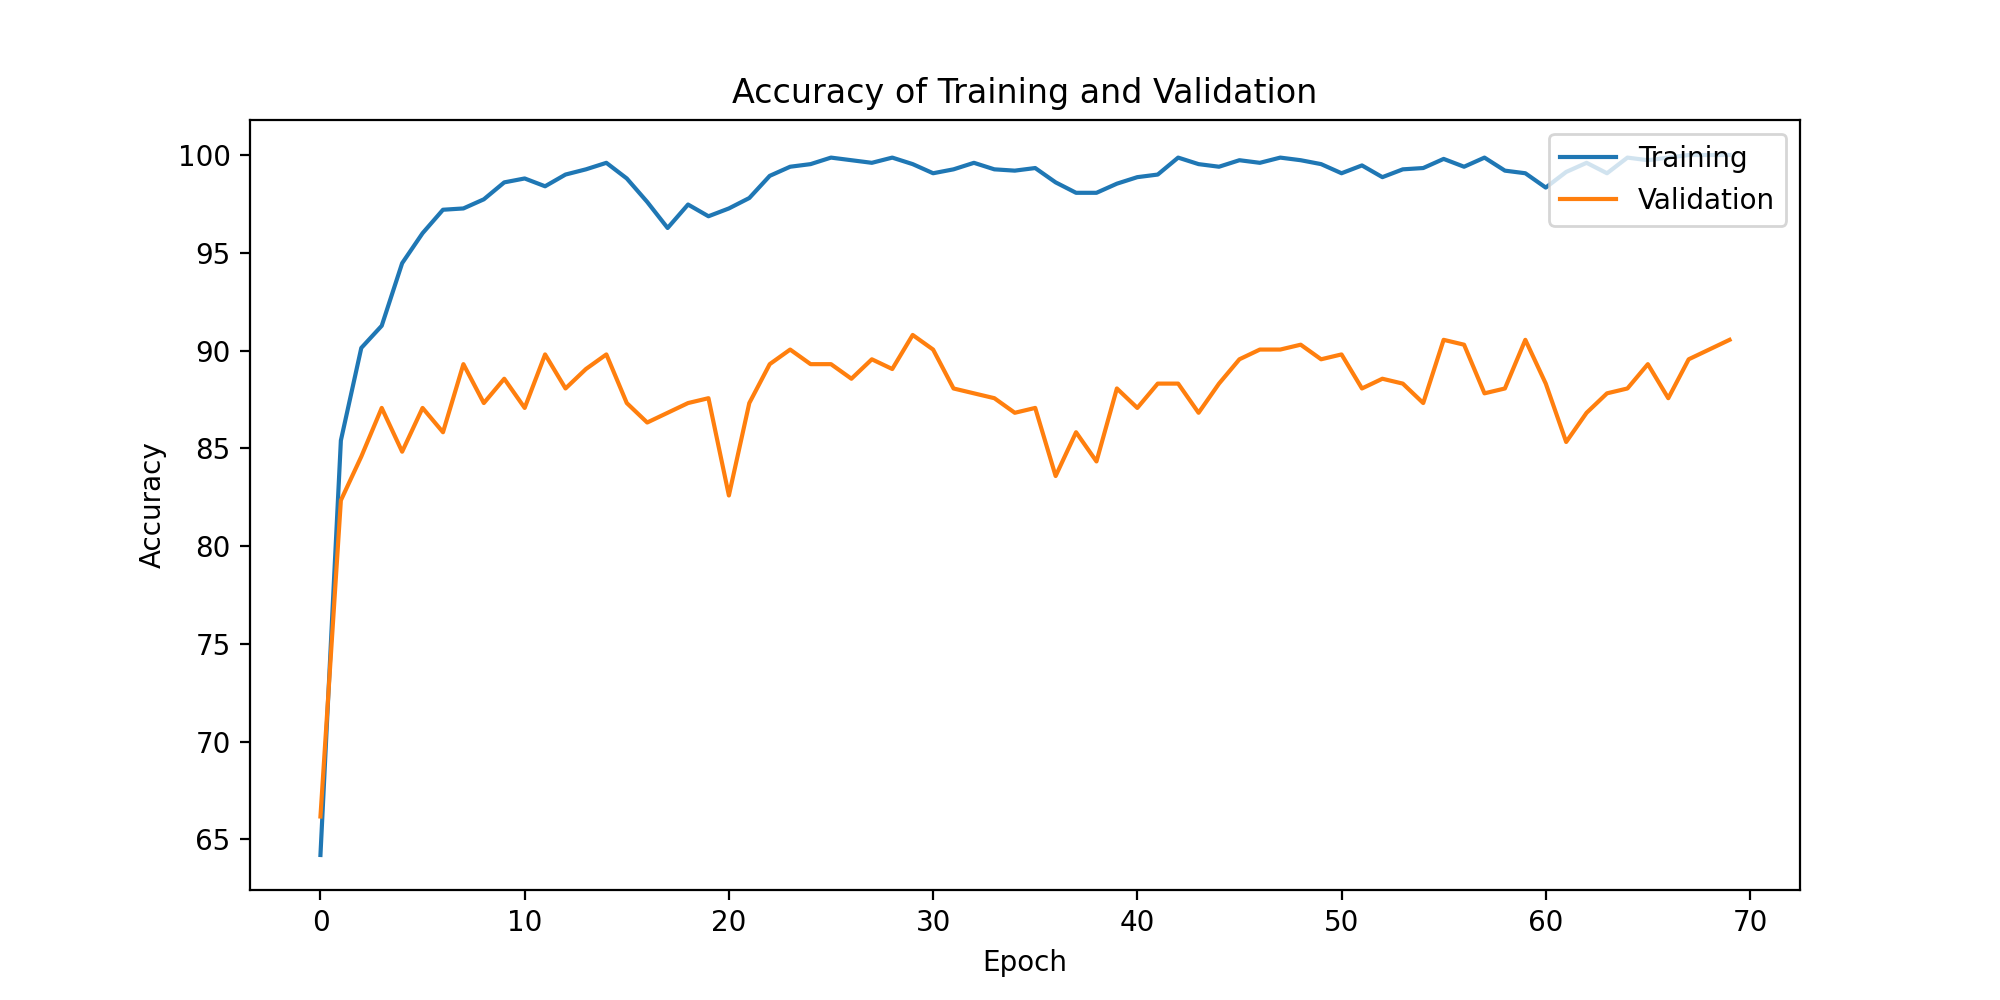

In [27]:
# Plot accuracy of training
fig, ax = plt.subplots(1, 1, figsize=(10,5))

ax.plot(train_acc['epochs'], train_acc['value'], label='Training')
ax.plot(val_acc['epochs'], val_acc['value'], label='Validation')

ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')

ax.legend(loc='upper right')

ax.set_title('Accuracy of Training and Validation')

plt.show()

<IPython.core.display.Javascript object>


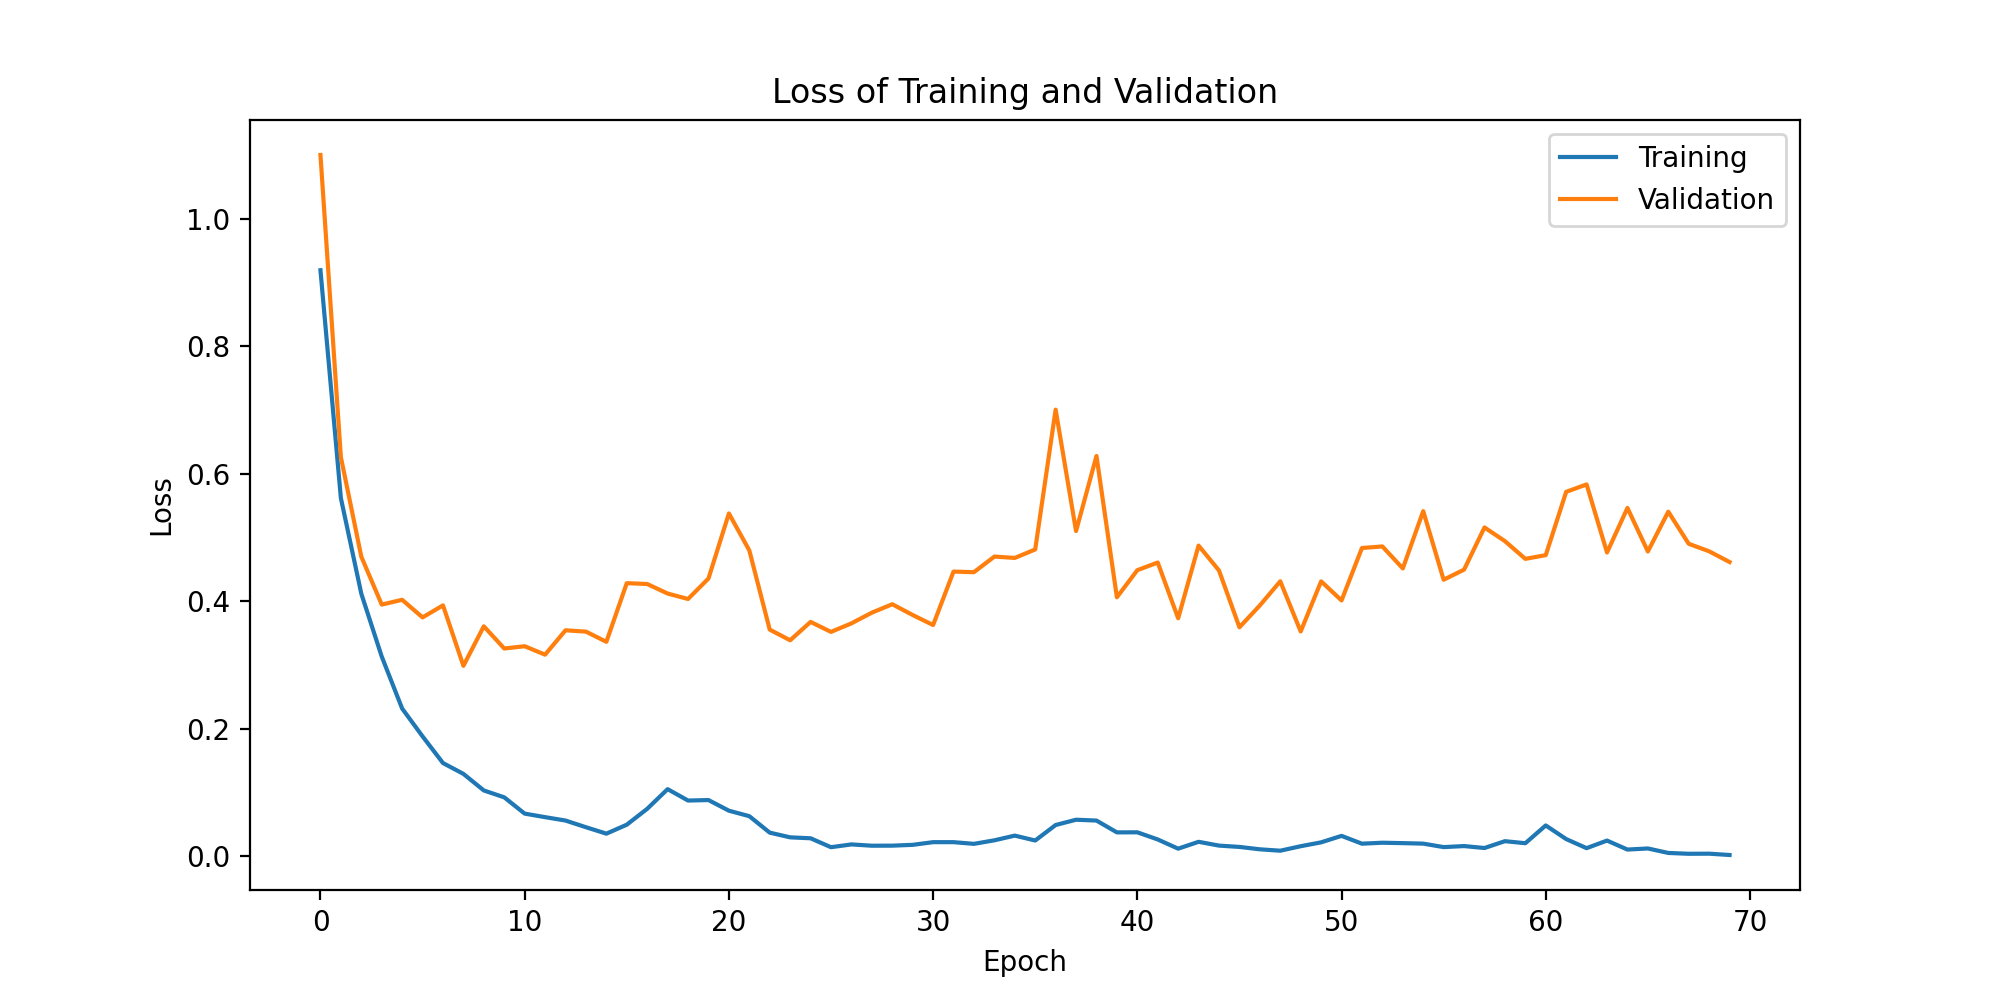

In [28]:
# Plot loss of training
fig, ax = plt.subplots(1, 1, figsize=(10,5))

ax.plot(train_loss['epochs'], train_loss['value'], label='Training')
ax.plot(val_loss['epochs'], val_loss['value'], label='Validation')

ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

ax.legend(loc='upper right')

ax.set_title('Loss of Training and Validation')

plt.show()

## Testing

In [29]:
y_pred_list = []
with torch.no_grad():
    model.eval()
    for X_batch, _ in test_loader:
        #X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        print(y_test_pred)
        _, y_pred_tags = torch.max(y_test_pred, dim = 1)
        y_pred_list.append(y_pred_tags.cpu().numpy())
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

print(len(y_pred_list))

tensor([[-4.4343,  7.3007, -2.1568, -5.6291]])
tensor([[-2.5105, -2.3204, -2.9462,  5.5179]])
tensor([[-2.3340,  5.0198, -3.7272, -1.0882]])
tensor([[-2.9860,  5.8997, -3.0292, -2.4576]])
tensor([[-3.5703, -4.5615, -2.5620,  7.1387]])
tensor([[ 7.5792, -4.1371, -2.1496, -4.6784]])
tensor([[-2.7494, -2.7365, -1.5298,  4.9993]])
tensor([[-3.5033, -3.9311,  0.5142,  3.6044]])
tensor([[-2.8814,  6.8757, -3.3139, -3.6282]])
tensor([[-4.2845,  8.5255, -3.8542, -5.2056]])
tensor([[11.2853, -6.0480, -3.6838, -6.7165]])
tensor([[-3.4980,  6.0482, -4.6929, -1.5316]])
tensor([[-3.2767, -4.3787, -3.6411,  7.9015]])
tensor([[ 8.6577, -4.6997, -2.6204, -5.0208]])
tensor([[-2.1952,  5.6330, -3.2832, -2.3914]])
tensor([[-2.2270, -1.7036,  2.1899, -0.5449]])
tensor([[-3.2626,  4.7822, -1.2524, -3.4554]])
tensor([[-4.5026,  8.5334, -3.6298, -4.9801]])
tensor([[ 4.3276, -2.7662, -0.9762, -2.5557]])
tensor([[ 6.9155, -3.4904, -2.3117, -3.7013]])
tensor([[-4.4811,  0.3463,  2.2408, -1.5873]])
tensor([[-3.9

<IPython.core.display.Javascript object>


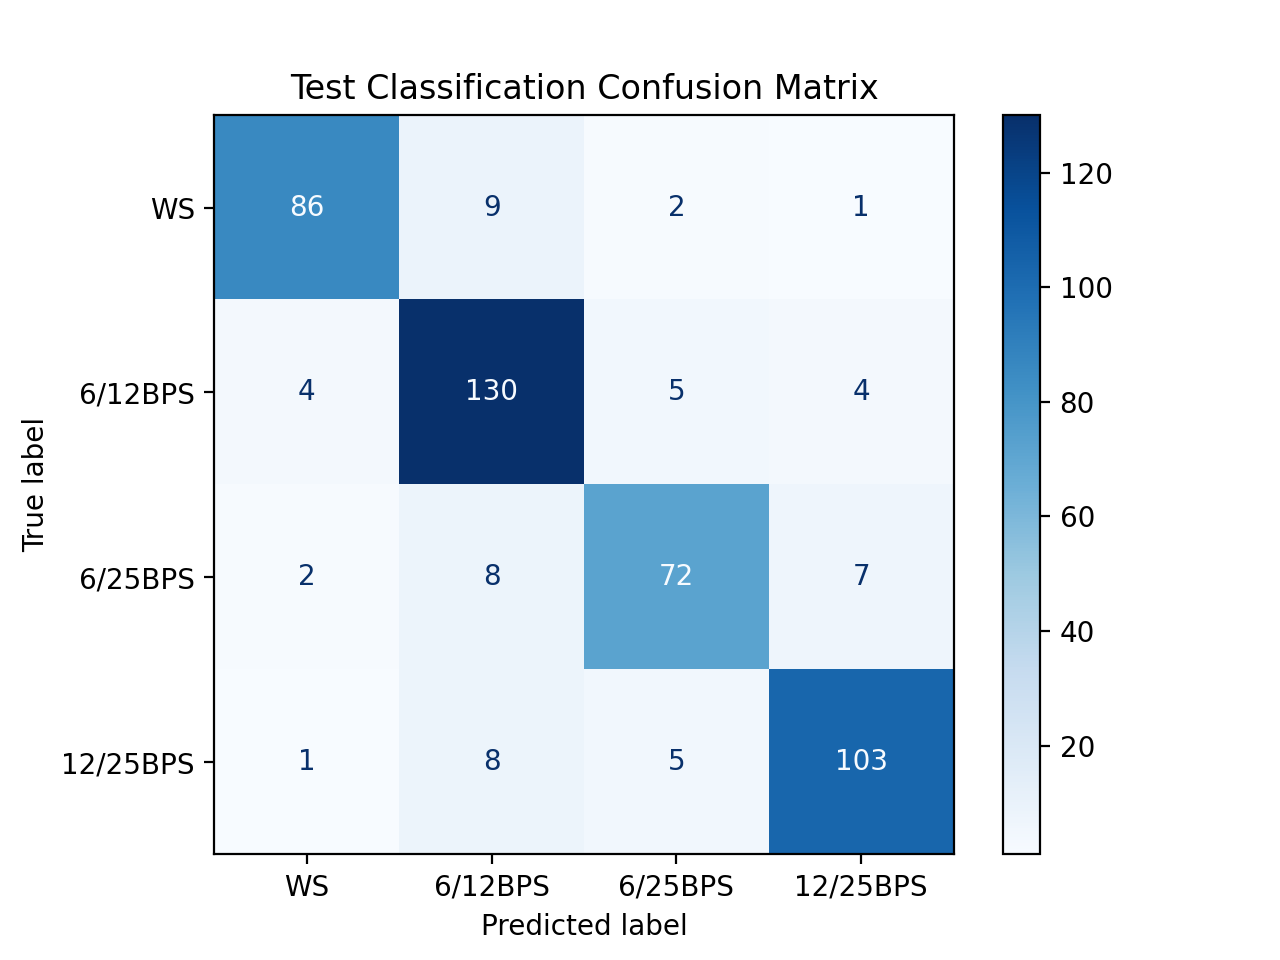

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, y_pred_list)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['WS', '6/12BPS', '6/25BPS', '12/25BPS'])
disp.plot(cmap=plt.cm.Blues)

plt.title('Test Classification Confusion Matrix')
plt.show()

In [31]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred_list))

              precision    recall  f1-score   support

         0.0       0.92      0.88      0.90        98
         1.0       0.84      0.91      0.87       143
         2.0       0.86      0.81      0.83        89
         3.0       0.90      0.88      0.89       117

    accuracy                           0.87       447
   macro avg       0.88      0.87      0.87       447
weighted avg       0.88      0.87      0.87       447

